In [1]:
import pandas as pd
import numpy as np


In [2]:
# Load your dataset
crop = pd.read_csv('/content/Crop_recommendation.csv')
crop

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [3]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
crop.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [5]:
crop.duplicated().sum()


np.int64(0)

In [6]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
crop['label'].value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


#Encoding

In [8]:
# Complete crop dictionary
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}

# Encoding with handling for missing values
crop['crop_num'] = crop['label'].map(crop_dict)


In [9]:
crop

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22


In [10]:
# Drop rows with NaN in 'crop_num' (introduced by missing keys in crop_dict)
crop.dropna(subset=['crop_num'], inplace=True)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


#Train_Test_Split

In [11]:
# Train-test split
X = crop.drop(['crop_num', 'label'], axis=1) # Drop both 'crop_num' and 'label'
y = crop['crop_num']

In [12]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [13]:
y

,crop_num
0,1
1,1
2,1
3,1
4,1
...,...
2195,22
2196,22
2197,22
2198,22


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


#Scale the Features using MinMaxScalar

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


#Model Training

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression  # <-- Make sure this import is included
from sklearn.metrics import accuracy_score

In [19]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

svc = SVC()
svc.fit(X_train, y_train)

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GradientBoostingClassifier()

In [20]:
y_pred1 = lr.predict(X_test)
y_pred2 = knn.predict(X_test)
y_pred3 = svc.predict(X_test)
y_pred4 = dt.predict(X_test)
y_pred5 = rf.predict(X_test)
y_pred6 = gb.predict(X_test)

In [21]:
print("Acc Logistic Regression:",accuracy_score(y_test,y_pred1))
print("Acc KNN",accuracy_score(y_test,y_pred2))
print("Acc Decision Tree",accuracy_score(y_test,y_pred4))
print("Acc Random Forest",accuracy_score(y_test,y_pred5))
print("Acc SVC",accuracy_score(y_test,y_pred3))
print("Acc Gradient Boosting",accuracy_score(y_test,y_pred6))

Acc Logistic Regression: 0.9454545454545454
Acc KNN 0.9704545454545455
Acc Decision Tree 0.9886363636363636
Acc Random Forest 0.9931818181818182
Acc SVC 0.9613636363636363
Acc Gradient Boosting 0.9818181818181818


In [22]:
final_data=pd.DataFrame({'Models':['LR','KNN','SVC','DT','RM','GBC'],
              'ACC':[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100,
                     accuracy_score(y_test,y_pred4)*100,
                     accuracy_score(y_test,y_pred5)*100,
                     accuracy_score(y_test,y_pred6)*100,]})
final_data

,Models,ACC
0,LR,94.545455
1,KNN,97.045455
2,SVC,96.136364
3,DT,98.863636
4,RM,99.318182
5,GBC,98.181818


/tmp/ipython-input-2735294299.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Models', y='ACC', data=final_data, palette=colors)


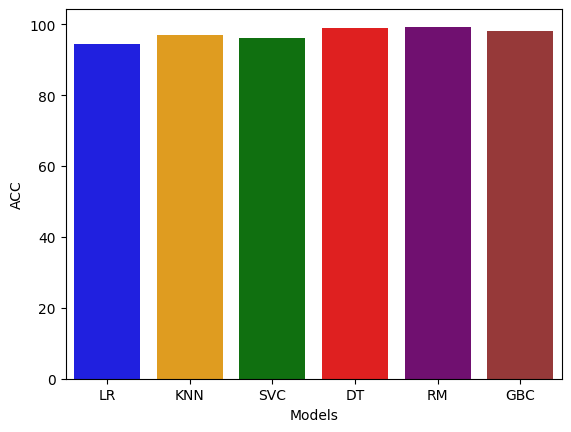

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your 'Models' column has 3 unique values
colors = ['blue', 'orange', 'green', 'red','purple','brown']  # Example colors

sns.barplot(x='Models', y='ACC', data=final_data, palette=colors)
plt.show()

In [24]:
# finally selected randomforest model

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
ypred = rfc.predict(X_test)
accuracy_score(y_test,ypred)

0.9954545454545455

#Predictive System

In [25]:
# Prediction function
def recommendation(N, P, k, temperature, humidity, ph, rainfall):
    features = np.array([[N, P, k, temperature, humidity, ph, rainfall]])
    transformed_features = ms.transform(features)
    prediction = rfc.predict(transformed_features)
    return prediction[0]



In [28]:
from sklearn.preprocessing import MinMaxScaler

# Scale the features using MinMaxScaler
ms = MinMaxScaler()
X_scaled = ms.fit_transform(X)

In [29]:
# Re-run the train-test split with scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [31]:
# Re-train the RandomForestClassifier with scaled data
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
# Prediction function (updated to use the fitted scaler 'ms')
def recommendation(N, P, k, temperature, humidity, ph, rainfall):
    features = np.array([[N, P, k, temperature, humidity, ph, rainfall]])
    transformed_features = ms.transform(features)
    prediction = rfc.predict(transformed_features)
    return prediction[0]

In [34]:
# Example usage (re-running the example from the original cell)
N = 28
P = 57
k = 17
temperature = 30.47758
humidity = 61.58245
ph = 9.416003
rainfall = 61.86634

predicted_crop_num = recommendation(N, P, k, temperature, humidity, ph, rainfall)

# Map prediction to crop name
crop_dict_reverse = {v: k for k, v in crop_dict.items()}
predicted_crop_name = crop_dict_reverse.get(predicted_crop_num, "Unknown")

print(f"Recommended crop: {predicted_crop_name}")

Recommended crop: mothbeans


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [35]:
pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 94.3 MB/s eta 0:00:00


In [36]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

# Load data and train model (you can skip this in real deployment if you save models)
@st.cache_resource
def load_and_train():
    crop = pd.read_csv("Crop_recommendation.csv")

    crop_dict = {
        'rice': 1, 'maize': 2, 'jute': 3, 'cotton': 4, 'coconut': 5,
        'papaya': 6, 'orange': 7, 'apple': 8, 'muskmelon': 9, 'watermelon': 10,
        'grapes': 11, 'mango': 12, 'banana': 13, 'pomegranate': 14, 'lentil': 15,
        'blackgram': 16, 'mungbean': 17, 'mothbeans': 18, 'pigeonpeas': 19,
        'kidneybeans': 20, 'chickpea': 21, 'coffee': 22
    }
    crop['crop_num'] = crop['label'].map(crop_dict)
    X = crop.drop(['crop_num', 'label'], axis=1)
    y = crop['crop_num']

    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    model = RandomForestClassifier()
    model.fit(X_scaled, y)

    return model, scaler, {v: k for k, v in crop_dict.items()}

model, scaler, crop_dict_reverse = load_and_train()

# Streamlit GUI
st.title("🌱 Crop Recommendation System")
st.markdown("Enter the soil and weather parameters to get a crop recommendation.")

# Input fields
N = st.slider("Nitrogen (N)", 0, 150, 50)
P = st.slider("Phosphorous (P)", 0, 150, 50)
K = st.slider("Potassium (K)", 0, 150, 50)
temperature = st.number_input("Temperature (°C)", 0.0, 50.0, 25.0)
humidity = st.number_input("Humidity (%)", 0.0, 100.0, 50.0)
ph = st.number_input("pH", 0.0, 14.0, 6.5)
rainfall = st.number_input("Rainfall (mm)", 0.0, 400.0, 100.0)

# Prediction
if st.button("Recommend Crop"):
    input_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)
    crop_name = crop_dict_reverse.get(prediction[0], "Unknown")
    st.success(f"✅ Recommended Crop: **{crop_name.capitalize()}**")


2025-09-04 16:10:24.535 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 16:10:24.739 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-09-04 16:10:24.739 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 16:10:24.741 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 16:10:24.742 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 16:10:25.245 Thread 'Thread-3': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 16:10:25.250 Thread 'Thread-3': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 16:10:25.250 Thread 'Thread-3': missing 

In [37]:
!pip install streamlit pyngrok --quiet

In [38]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

@st.cache_resource
def load_and_train():
    crop = pd.read_csv("Crop_recommendation.csv")

    crop_dict = {
        'rice': 1, 'maize': 2, 'jute': 3, 'cotton': 4, 'coconut': 5,
        'papaya': 6, 'orange': 7, 'apple': 8, 'muskmelon': 9, 'watermelon': 10,
        'grapes': 11, 'mango': 12, 'banana': 13, 'pomegranate': 14, 'lentil': 15,
        'blackgram': 16, 'mungbean': 17, 'mothbeans': 18, 'pigeonpeas': 19,
        'kidneybeans': 20, 'chickpea': 21, 'coffee': 22
    }
    crop['crop_num'] = crop['label'].map(crop_dict)
    X = crop.drop(['crop_num', 'label'], axis=1)
    y = crop['crop_num']

    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    model = RandomForestClassifier()
    model.fit(X_scaled, y)

    return model, scaler, {v: k for k, v in crop_dict.items()}

model, scaler, crop_dict_reverse = load_and_train()

st.title("🌱 Crop Recommendation System")
st.markdown("Enter the soil and weather parameters to get a crop recommendation.")

N = st.slider("Nitrogen (N)", 0, 150, 50)
P = st.slider("Phosphorous (P)", 0, 150, 50)
K = st.slider("Potassium (K)", 0, 150, 50)
temperature = st.number_input("Temperature (°C)", 0.0, 50.0, 25.0)
humidity = st.number_input("Humidity (%)", 0.0, 100.0, 50.0)
ph = st.number_input("pH", 0.0, 14.0, 6.5)
rainfall = st.number_input("Rainfall (mm)", 0.0, 400.0, 100.0)

if st.button("Recommend Crop"):
    input_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)
    crop_name = crop_dict_reverse.get(prediction[0], "Unknown")
    st.success(f"✅ Recommended Crop: **{crop_name.capitalize()}**")


Writing app.py


In [39]:
from google.colab import files
uploaded = files.upload()

Saving Crop_recommendation.csv to Crop_recommendation (1).csv


In [40]:
!ngrok config add-authtoken 30d14rpkPcKzdRSQzUpIwiABi58_7aVmAqUFHek1oGgWnveVJ

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [41]:
from pyngrok import ngrok
ngrok.kill()

In [42]:
!streamlit run app.py &>/content/logs.txt &

from pyngrok import ngrok
url = ngrok.connect(8501)
print(f"🌐 Your Streamlit app is live at: {url}")

🌐 Your Streamlit app is live at: NgrokTunnel: "https://04829d9cf6a5.ngrok-free.app" -> "http://localhost:8501"
